---
#  Customer Segmentation using K-Means Clustering
---
##  1. Introduction

> In this project, we will segment customers based on their annual income and spending score using K-Means clustering.  
> This can help businesses to target marketing strategies according to customer groups.
---

## 2. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pickle

---

## 3. Load the Data

In [16]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---

## 4. Data Preprocessing

In [18]:
# Selecting features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

---

## 5. Finding the Optimal Number of Clusters (Elbow Method)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

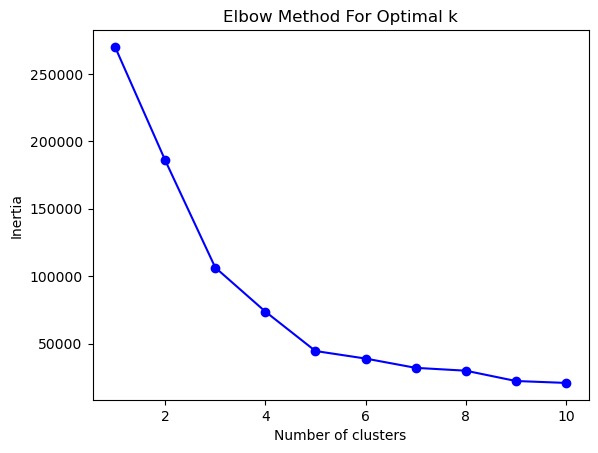

In [21]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

> **Interpretation:** Find the "elbow point" where the curve starts bending — that's the best `k`.

(Assume we choose **k = 4**.)

---

## 6. Apply K-Means Clustering

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Assigning the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
df.head()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


---

## 7. Visualizing the Clusters

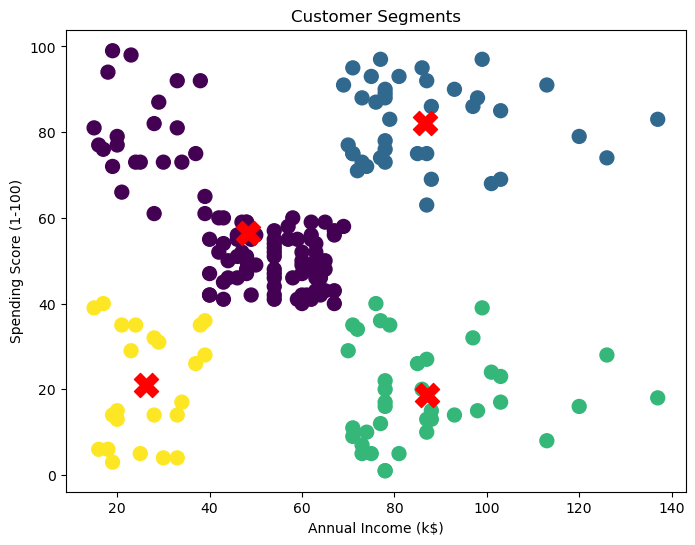

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=300, marker='X') # Centroids
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

---

## 8. Save the Trained Model

In [30]:
# Saving the model
with open('customer_segmentation_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

---

## 9. Load the Model and Predict New Data

In [33]:
# Loading the model
with open('customer_segmentation_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predicting for new customers
new_customers = np.array([
    [50, 60],
    [120, 90]
])

predicted_clusters = loaded_model.predict(new_customers)
print("Predicted clusters for new customers:", predicted_clusters)

Predicted clusters for new customers: [0 1]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---

## 10. Conclusion

> Using K-Means clustering, we successfully segmented customers into different groups based on their income and spending behavior.  
> This segmentation can help businesses personalize their marketing strategies for better customer engagement and sales.

---